# A
1. Three support vectors are needed 1 to classify each class.
2. ![title](questtion1_rbf.png)
3. Support vectors are circled in red and the decision boundry is drawn in green
 ![title](question1_line.png)
    a. Finding the size of the margin:
    ![title](support_vecs.jpg)
    b. The signed alphas have to sum up to 1 so giving $\begin{bmatrix}5&1\end{bmatrix}$ and $\begin{bmatrix}8&5\end{bmatrix}$ wheights of 0.5 and $\begin{bmatrix}7&2\end{bmatrix}$ a weight of 1 would let the summation of the signed alphas go to zero.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

## 1-C

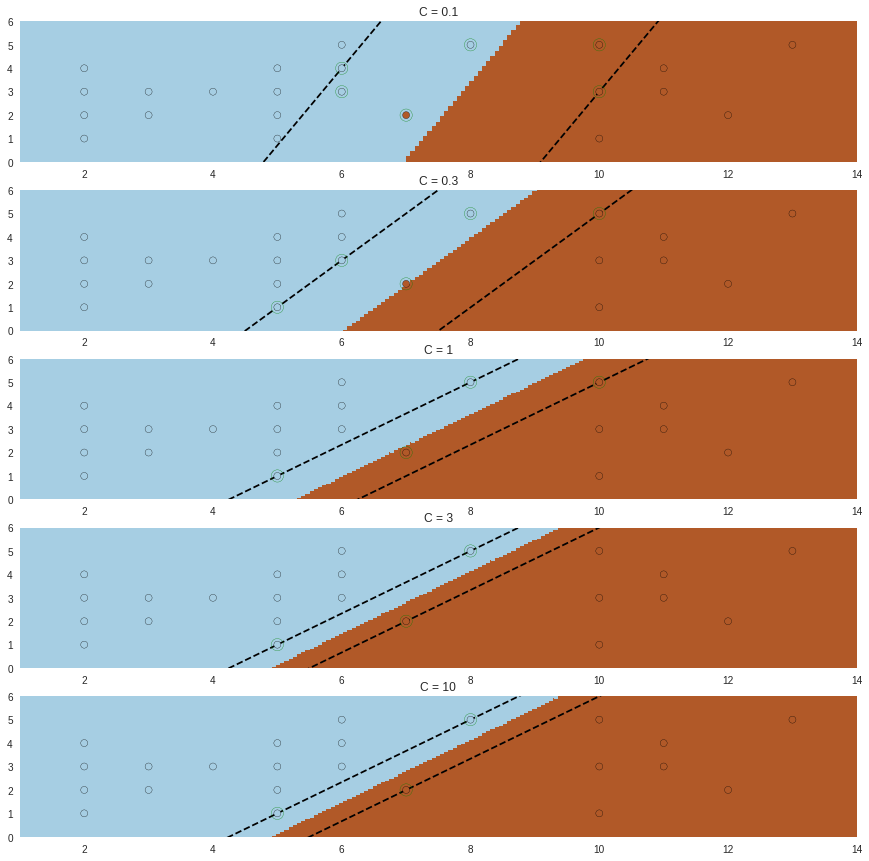

In [57]:
X = np.array([[2,1],[2,2],[2,3],[2,4],[3,2],[3,3],[4,3],
              [5,1],[5,2],[5,3],[5,4],[6,3],[6,4],[6,5],
              [8,5],[7,2],[10,1],[10,3],[10,5],[11,3],
              [11,4],[12,2],[13,5]])
Y = np.array(15*[-1] + 8*[1])

x_min = np.min(X[:,0])-1
x_max = np.max(X[:,0])+1
y_min = np.min(X[:,1])-1
y_max = np.max(X[:,1])+1

penalties = [0.1,0.3,1,3,10]
rows,cols = len(penalties),1
fig,axis = plt.subplots(rows,cols,figsize=(15,15))

axis = axis.ravel()
ensemble = []

for idx,penalty in enumerate(penalties):
    
    clf = SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)
    ensemble.append(clf)
    
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(x_min,x_max)
    yy = a * xx - (clf.intercept_[0]) / w[1]


    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin
    
#     axis[idx].plot(xx, yy, 'k-')
    axis[idx].plot(xx, yy_down, 'k--')
    axis[idx].plot(xx, yy_up, 'k--')

    axis[idx].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=150,
                facecolors='none', zorder=10, edgecolors='g')
    axis[idx].scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    axis[idx].axis('tight')
    axis[idx].set_xlim(x_min,x_max)
    axis[idx].set_ylim(y_min,y_max)

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    Z = Z.reshape(XX.shape)
    axis[idx].pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)
    axis[idx].set_title(f'C = {penalty}')


plt.show()

In [58]:
W = []
for clf,c in zip(ensemble,penalties):
    signed_alphas = clf.dual_coef_[0]
    svs = clf.support_vectors_
    svs_cls = np.sign(signed_alphas).reshape(-1,1)
    w = np.sum(svs*signed_alphas.reshape(-1,1),axis=0,keepdims=True)
    margin_svs = svs[np.abs(signed_alphas)< c,:]
    intercept = np.mean(svs_cls.T - w.dot(svs.T),axis=1)[0]
    print(f'for c = {c}:')
    print(f'signed_alphas={signed_alphas}')
    
    print(f'support vectors on margin = \n{margin_svs}')

    print(f'w = {w}')
    print(f'b = {intercept}')
    W.append(w)
    
    print('----------------------------------------------------------------------')
    

for c = 0.1:
signed_alphas=[-0.1        -0.04117647 -0.1         0.1         0.04117647  0.1       ]
support vectors on margin = 
[[  6.   4.]
 [ 10.   3.]]
w = [[ 0.46470588 -0.14117647]]
b = -3.1225490196078383
----------------------------------------------------------------------
for c = 0.3:
signed_alphas=[-0.05618277 -0.1713038  -0.3         0.3         0.22748657]
support vectors on margin = 
[[  5.   1.]
 [  6.   3.]
 [ 10.   5.]]
w = [[ 0.66612905 -0.33266132]]
b = -3.931612972250465
----------------------------------------------------------------------
for c = 1:
signed_alphas=[-0.56257136 -0.5933813   1.          0.15595266]
support vectors on margin = 
[[  5.   1.]
 [  8.   5.]
 [ 10.   5.]]
w = [[ 0.9996194  -0.74971455]]
b = -5.060573220629826
----------------------------------------------------------------------
for c = 3:
signed_alphas=[-1.19962207 -0.79981104  1.99943311]
support vectors on margin = 
[[ 5.  1.]
 [ 8.  5.]
 [ 7.  2.]]
w = [[ 1.59943311 -1.19981104]]
b = 

d. ![title](1-D.jpg)
Discarding $h_5$ since it is similar to $h_4$<br>
e. ![title](1-e.jpg)

# B
1. e. ![title](B.jpg)


In [68]:
X_r = np.array([[1,5],
                [2,6],
                [2,10],
                [2,12],
                [3,17],
                [3,12],
                [4,6],
                [4,5],
                [4,7],
                [5,10]])
y_r = np.array([10, 40, 50, 60, 70, 50, 30, 20, 40, 70]).reshape(-1,1)
aug_X = np.concatenate((X_r,np.ones_like(y_r)),axis=1)

x1_min = np.min(X_r[:,0])-1
x1_max = np.max(X_r[:,0])+1
x2_min = np.min(X_r[:,1])-1
x2_max = np.max(X_r[:,1])+1

In [69]:
regressor = LinearRegression()
regressor.fit(X_r,y_r)
w_1 = regressor.coef_
b_1 = regressor.intercept_
print(f'w = {w_1}')
print(f'b = {b_1}')

w = [[ 4.28571429  4.34782609]]
b = [-7.98757764]


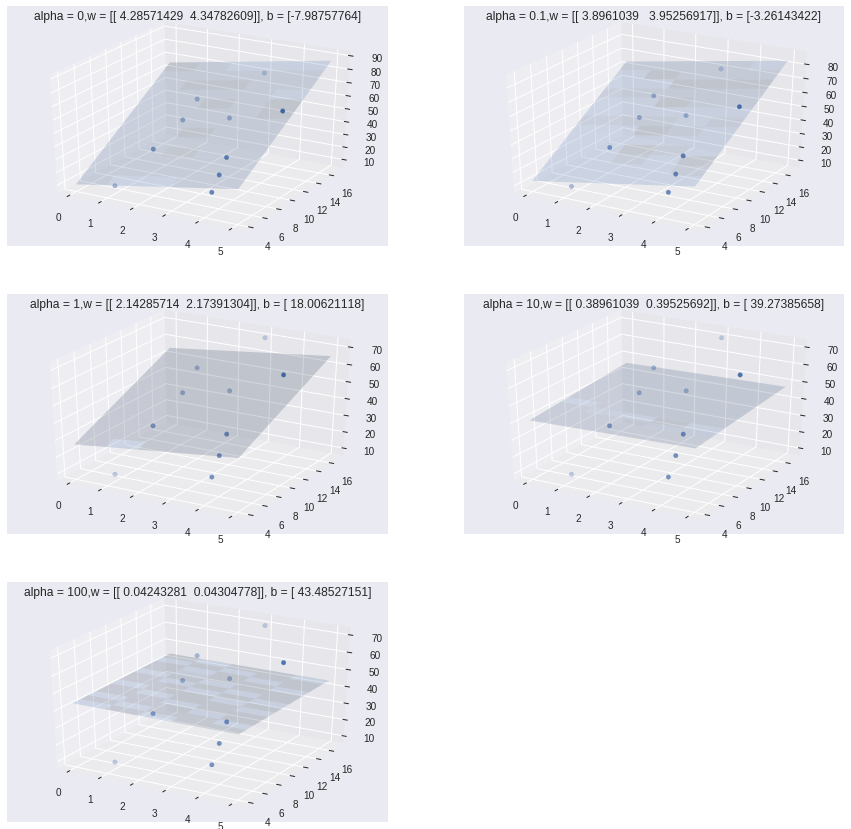

In [75]:
alphas = [0,0.1,1,10,100]
fig = plt.figure(figsize=(15,15))
reg_ensemble = []
for idx,alpha in enumerate(alphas):
    clf = LinearRegression() if alpha == 0 else Ridge(alpha=alpha,normalize=True)
    clf.fit(X_r,y_r)
    reg_ensemble.append(clf)
    w = clf.coef_
    b = clf.intercept_
    x1, x2 = np.meshgrid(range(x1_min,x1_max), range(x2_min,x2_max))
    h_x = w[0,0]*x1 + w[0,1]*x2 + b
    ax = fig.add_subplot(3, 2, idx+1, projection='3d')
    ax.plot_surface(x1,x2,h_x,alpha=0.2)
    ax.scatter(X_r[:,0],X_r[:,1],y_r)
    ax.set_title(f'alpha = {alpha},w = {w}, b = {b}')
plt.show()

##### 3
$h_1(\boldsymbol{x}) = \begin{bmatrix}4.30 &&4.35\end{bmatrix}\boldsymbol{x}-7.99$<br>
$h_2(\boldsymbol{x}) = \begin{bmatrix}3.90&&3.95\end{bmatrix}\boldsymbol{x}-3.26$<br>
$h_3(\boldsymbol{x}) = \begin{bmatrix}2.14&&2.17\end{bmatrix}\boldsymbol{x}+18.0062$<br>
$h_3(\boldsymbol{x}) = \begin{bmatrix}0.39 && 0.395\end{bmatrix}\boldsymbol{x}+ 39.27$<br>
$h_4(\boldsymbol{x}) = \begin{bmatrix}0.042 & 0.043\end{bmatrix}\boldsymbol{x}+ 43.485$<br>
<hr>
$\boldsymbol{p_1} = \begin{bmatrix}3 \\ 16\end{bmatrix}$<br>
$\boldsymbol{p_2} = \begin{bmatrix}2 \\ 4\end{bmatrix}$<br>
$\boldsymbol{p_3} = \begin{bmatrix}5 \\ 4\end{bmatrix}$<br>
<hr>
$h_1(\boldsymbol{p_1}) = 74.43478261$<br>
$h_2(\boldsymbol{p_1}) = 71.66798419$<br>
$h_3(\boldsymbol{p_1}) = 59.2173913$<br>
$h_4(\boldsymbol{p_1}) = 46.76679842$<br>
$h_5(\boldsymbol{p_1}) = 44.30133448$<br>
$Pred_{avg} = 59.277 $
<hr>
$h_1(\boldsymbol{p_2}) = 17.97515528$<br>
$h_2(\boldsymbol{p_2}) = 20.34105025$<br>
$h_3(\boldsymbol{p_2}) = 30.98757764$<br>
$h_4(\boldsymbol{p_2}) = 41.63410503$<br>
$h_5(\boldsymbol{p_2}) = 43.74232827$<br>
$Pred_{avg} = 30.936 $
<hr>
$h_1(\boldsymbol{p_2}) = 30.83229814$<br>
$h_2(\boldsymbol{p_2}) = 32.02936194$<br>
$h_3(\boldsymbol{p_2}) = 37.41614907$<br>
$h_4(\boldsymbol{p_2}) = 42.80293619$<br>
$h_5(\boldsymbol{p_2}) = 43.86962671$<br>
$Pred_{avg} = 37.39 $
<hr>

